# This jupyter notebook is prepared by “Nawras Rawas Qalaji”.

#1. Load Data and perform basic EDA 


In [2]:
#I. import neccessary libriaries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, ElasticNet, Lasso
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
import scipy.cluster.hierarchy as shc

#II. import hrdata.csv to hrdata dataframe
hrdata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hrdata3.csv")

#count columns and rows
print("Count Columns and rows")
print("columns " + str(hrdata.shape[1]))
print("rows " + str(hrdata.shape[0]) + "\n")

#III. top and bottom 5 rows
print("\nTop Five Rows")
print(hrdata.head())
print("\nBottom Five Rows")
print(hrdata.tail())

#IV. show any missing values
print("\nMissing Values Numerically")
missingValues = hrdata.isnull().sum().sort_values(ascending = False)
print(missingValues)

#V. check data types
print(hrdata.info())

Count Columns and rows
columns 8
rows 12977


Top Five Rows
   Unnamed: 0  enrollee_id  city_development_index  experience  company_size  \
0           1        29725                   0.776          15             2   
1           4          666                   0.767          21             2   
2           6        28806                   0.920           5             2   
3           7          402                   0.762          13             0   
4           8        27107                   0.920           7             2   

   last_new_job  training_hours  target  
0             5              47     0.0  
1             4               8     0.0  
2             1              24     0.0  
3             5              18     1.0  
4             1              46     1.0  

Bottom Five Rows
       Unnamed: 0  enrollee_id  city_development_index  experience  \
12972       19149          251                   0.920           9   
12973       19150        32313                   

1) IV. Is there any null values on any column?
*   There are no missing or null values

1) V. Are all the columns numeric such as float or int? If not, please convert them to numeric (int/float) before going to the next step.
*   Yes all the columns are numeric


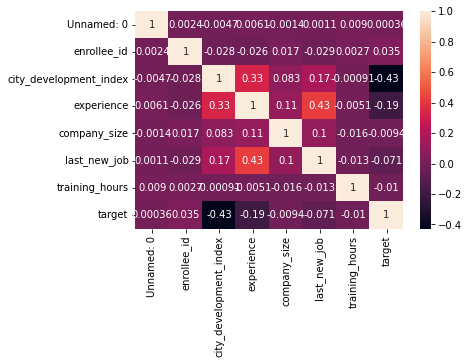

<Figure size 432x288 with 0 Axes>

In [3]:
#VI. Plot the heatmap with correlations
correlationNums = hrdata.select_dtypes(include = [np.number])
sns.heatmap(data = correlationNums.corr(), annot = True)
plt.figure()  
plt.show()

#2. Feature Selection and Pre-processing 

In [4]:
#I. Put all the data from the dataframe into X, except the enrolle_id and the target columns
hrdata = hrdata.drop(["Unnamed: 0"], axis = 1)
X = hrdata.copy()
X = X.drop(["enrollee_id", "target"], axis = 1)

X

,city_development_index,experience,company_size,last_new_job,training_hours
0,0.776,15,2,5,47
1,0.767,21,2,4,8
2,0.920,5,2,1,24
3,0.762,13,0,5,18
4,0.920,7,2,1,46
...,...,...,...,...,...
12972,0.920,9,2,1,36
12973,0.920,10,3,3,23
12974,0.920,7,1,1,25
12975,0.920,21,2,4,44


In [5]:
#II. Perform feature scaling
scaler = StandardScaler();
scaler.fit(X)
scaled_X = scaler.transform(X)
reverseScaled_X = scaler.inverse_transform(scaled_X)


print("\n scaled");
print(scaled_X)
print("\n reverse scaled");
print(reverseScaled_X)


 scaled
[[-0.50342203  0.63395707 -0.5747232   1.69076217 -0.30839586]
 [-0.57841303  1.54600905 -0.5747232   1.08113696 -0.95180478]
 [ 0.69643399 -0.88612956 -0.5747232  -0.74773864 -0.68784215]
 ...
 [ 0.69643399 -0.58211224 -1.0314958  -0.74773864 -0.67134448]
 [ 0.69643399  1.54600905 -0.5747232   1.08113696 -0.35788885]
 [-0.28678136 -1.64617288  0.338822   -0.13811344  0.51648738]]

 reverse scaled
[[ 0.776 15.     2.     5.    47.   ]
 [ 0.767 21.     2.     4.     8.   ]
 [ 0.92   5.     2.     1.    24.   ]
 ...
 [ 0.92   7.     1.     1.    25.   ]
 [ 0.92  21.     2.     4.    44.   ]
 [ 0.802  0.     4.     2.    97.   ]]


#3. KMeans Clustering


In [11]:
#I. Import related library for Kmeans and perform Kmeans on X 
kmeans = KMeans(n_clusters=2, random_state=47, init = "k-means++")
k = kmeans.fit(scaled_X)

#II. Show the cluster centers as it is and then inverse the scale and show the centers
print("\nscaled cluster centers")
print(k.cluster_centers_)
print(k.fit_predict(scaled_X))

print("\nreversed scaled cluster centers")

k_reverse = kmeans.fit(reverseScaled_X)
print(k_reverse.cluster_centers_)
print(k_reverse.fit_predict(reverseScaled_X))

k = kmeans.fit(scaled_X)


scaled cluster centers
[[-0.31364817 -0.63941844 -0.15207764 -0.55076921  0.01170319]
 [ 0.44177356  0.90062111  0.21420141  0.77575864 -0.01648395]]
[1 1 0 ... 0 1 0]

reversed scaled cluster centers
[[  0.83639888  10.83377685   3.26905531   2.23474625  41.97690553]
 [  0.83649939  10.81099796   3.21181263   2.19144603 167.34052953]]
[0 0 0 ... 0 0 0]


II. Please explain in words about the centers relating them to the columns of the data set
*   Kmeans determines the centers by trying to seperate data samples into groups of equal varience which is determined by the data in the columns. Essentially similar data samples will be clustered closer together while differing data will be farther apart 

In [12]:
#III. Show the distance matrix
print("\ndistance matrix")
print(k.transform(scaled_X))


#IV. Show the labels
print("\nlabels")
print(k.labels_)

#V. Add a new column to your data frame called cluster_label
hrdata["cluster_label"] = k.labels_
hrdata


distance matrix
[[2.6387601  1.58409296]
 [2.93535149 1.74579189]
 [1.3371321  2.57904978]
 ...
 [1.51732572 2.56222519]
 [2.96221279 1.14612076]
 [1.2962834  2.85511871]]

labels
[1 1 0 ... 0 1 0]


,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target,cluster_label
0,29725,0.776,15,2,5,47,0.0,1
1,666,0.767,21,2,4,8,0.0,1
2,28806,0.920,5,2,1,24,0.0,0
3,402,0.762,13,0,5,18,1.0,1
4,27107,0.920,7,2,1,46,1.0,0
...,...,...,...,...,...,...,...,...
12972,251,0.920,9,2,1,36,1.0,0
12973,32313,0.920,10,3,3,23,0.0,1
12974,29754,0.920,7,1,1,25,0.0,0
12975,24576,0.920,21,2,4,44,0.0,1


In [13]:
#VI. Add a column target_int and write a function or use a strategy to store the int version of the target column into the target_int column 
hrdata["target_int"] = hrdata["target"].astype(int)
hrdata

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target,cluster_label,target_int
0,29725,0.776,15,2,5,47,0.0,1,0
1,666,0.767,21,2,4,8,0.0,1,0
2,28806,0.920,5,2,1,24,0.0,0,0
3,402,0.762,13,0,5,18,1.0,1,1
4,27107,0.920,7,2,1,46,1.0,0,1
...,...,...,...,...,...,...,...,...,...
12972,251,0.920,9,2,1,36,1.0,0,1
12973,32313,0.920,10,3,3,23,0.0,1,0
12974,29754,0.920,7,1,1,25,0.0,0,0
12975,24576,0.920,21,2,4,44,0.0,1,0


In [14]:
#VII. top and bottom 5 rows with new added columns
print("\nTop Five Rows")
print(hrdata.head())
print("\nBottom Five Rows")
print(hrdata.tail())


Top Five Rows
   enrollee_id  city_development_index  experience  company_size  \
0        29725                   0.776          15             2   
1          666                   0.767          21             2   
2        28806                   0.920           5             2   
3          402                   0.762          13             0   
4        27107                   0.920           7             2   

   last_new_job  training_hours  target  cluster_label  target_int  
0             5              47     0.0              1           0  
1             4               8     0.0              1           0  
2             1              24     0.0              0           0  
3             5              18     1.0              1           1  
4             1              46     1.0              0           1  

Bottom Five Rows
       enrollee_id  city_development_index  experience  company_size  \
12972          251                   0.920           9             2   


In [15]:
#VIII. compare the cluster label with the ground truth

#Confusion matrix and classification report
print("\nconfusion matrix")
print(confusion_matrix(hrdata["target_int"], k.labels_))
print("\nclassification report")
print(classification_report(hrdata["target_int"], k.labels_))

#Missclassification count
print("\nMissclassification count:")
print(confusion_matrix(hrdata["target_int"], k.labels_)[0][1] + confusion_matrix(hrdata["target_int"], k.labels_)[1][0])


confusion matrix
[[5835 4860]
 [1747  535]]

classification report
              precision    recall  f1-score   support

           0       0.77      0.55      0.64     10695
           1       0.10      0.23      0.14      2282

    accuracy                           0.49     12977
   macro avg       0.43      0.39      0.39     12977
weighted avg       0.65      0.49      0.55     12977


Missclassification count:
6607


IX. Discuss the numbers from 3 Viii and any thoughts on it
* The numbers are not very accurate, since the labels are not related to target, kmeans puts similar data into two groups defined as 0 and 1. However target refers to whether a canadiate wants to work for a company after training or not. 

In [16]:
#X. Print the inertia
print(k.inertia_)

49643.86379769514


XI. What is the elbow method and what is its purpose of it in the case of KMeans clustering?
* The elbow method is used to find the optimal number of clusters data should be clustered into. In the case of KMeans it does exactly that, finds the optimal number of k clusters


Text(0, 0.5, 'WCSS')

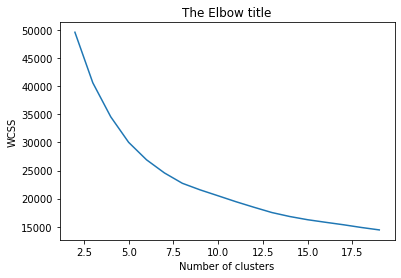

In [17]:
#XII Plot the inertia for the different numbers of clusters from 2 to 20
wcss=[]
for i in range(2,20):
  kmeans = KMeans(i, init = "k-means++")
  kmeans.fit(scaled_X)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(2,20)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

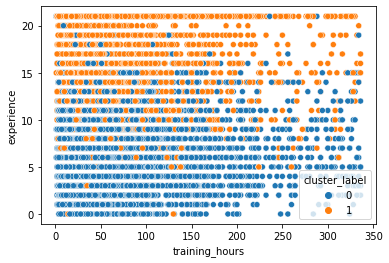

In [18]:
#XIII Show a scatter plot with training hours against experience where the points should be colored based on the two cluster labels
sns.scatterplot(x = hrdata['training_hours'], y = hrdata['experience'], hue = hrdata['cluster_label'])

XIII. Write any thoughts on this plot
* The plot shows that data with experience beyond about 10 begin to cluster more towards group 1 and those below are put into group 0. Training hours doesnt appear to have a notable effect on which group the data is seperated into compared experience as shown by the plot and how even as training hours increases no notable change is generated.

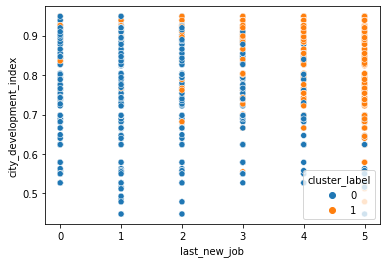

In [19]:
#XIII Show a scatter plot with any other two attributes you are interested in
sns.scatterplot(x = hrdata['last_new_job'], y = hrdata['city_development_index'], hue = hrdata['cluster_label'])

XIV. Write any thoughts on the second plot
* As last new job increases it looks like there is a slight increase in data samples being clustered into group 0, especially towards 5. While there seem to be more instances of a higher city development index the actual number doesn't appear to have an effect on whether it is grouped in group 0 or 1 compared to last new job

#4. AgglomerativeClustering 

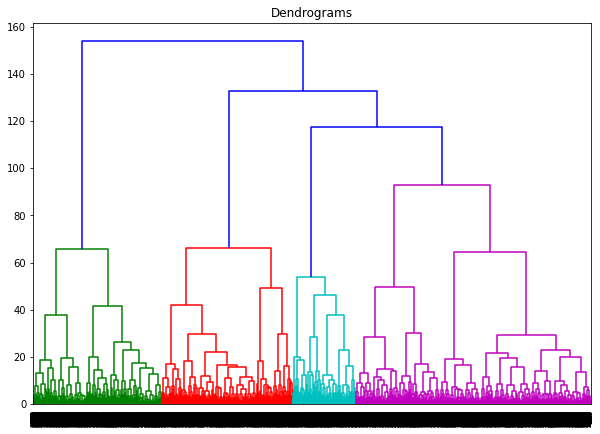

In [20]:
#I. plot a dendrogram 
plt.figure(figsize= (10,7)) 
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_X, method='ward'))

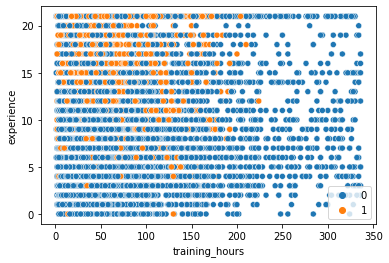

In [21]:
#II. Perform AgglomerativeClustering with 2 clusters first, and use euclidean distance for affinity and linkage = 'ward' 
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
AC.fit_predict(scaled_X)

#III After creating the clusters, plot training hours against experience
sns.scatterplot(x = hrdata['training_hours'], y = hrdata['experience'], hue = AC.labels_)

III. Discuss anything interesting
* The data samples grouped in group 1 seem to cluster near the top left portion of the graph, so a higher experience and lower training hours seems to put more data samples into group 1 than anywhere else. This differs from kmeans clustering where experience seemed to have no effect on whether a sample was grouped into group 0 or 1 

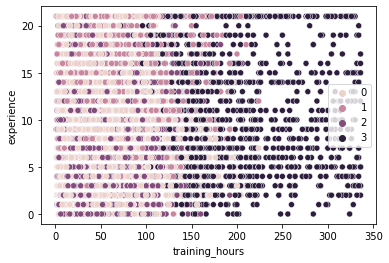

In [22]:
#IV. Then, increase the number of clusters to 4 or 5 and build the clusters again and plot them again to see any difference
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
AC.fit_predict(scaled_X)

sns.scatterplot(x = hrdata['training_hours'], y = hrdata['experience'], hue = AC.labels_)